<a href="https://colab.research.google.com/github/Ashfakur-Rahman/HDD-Visualization-DataScience-SUST/blob/main/HDD%20Lab_Assignment%2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [4]:
# Registration Number: 202454206017
# Course: HDD Lab (STA 0542 5188)
# Assignment-02

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported successfully!")

Imported successfully!


# Loading the Dataset

In [5]:
# Load dataset
df = pd.read_csv("customer_data.csv")

# Preview data
print(df.head())
print(df.info())

   Age       Income  Education_Years  Experience_Years  Spending_Score  \
0   56  25903.30520               12                13              63   
1   69  53051.95454               17                26              22   
2   46  38654.73882               11                28              70   
3   32  28666.19436               11                38              21   
4   60  40301.40674               11                38              96   

       Savings  Credit_Score         Debt  Hours_Online  Purchases_Month  ...  \
0  19560.15085           684  15031.51868            10                5  ...   
1  16273.42337           732  21472.02455             3                6  ...   
2  11729.48424           630   3447.25069            10                4  ...   
3  20099.81639           709  10506.40384             0                9  ...   
4  16293.42108           735   9128.02300            11                4  ...   

   Discount_Usage  Mobile_App_Usage  Transactions_Value  Fraud_Risk_

# Q1(a)(i): Income vs Spending_Score (Scatter Plot)

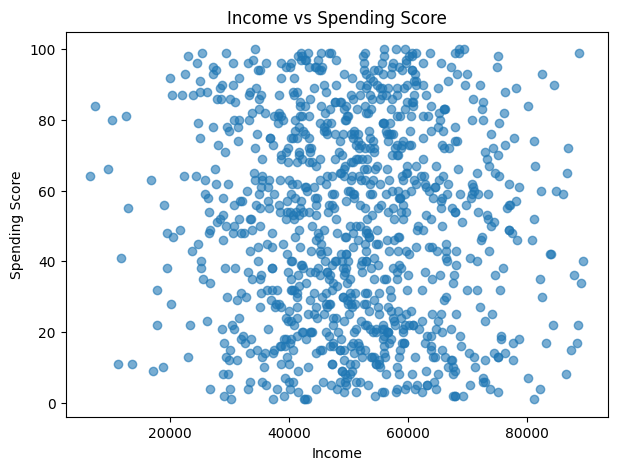

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df["Income"], df["Spending_Score"], alpha=0.6)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

# Q1(a)(ii): Color by Risk_Class

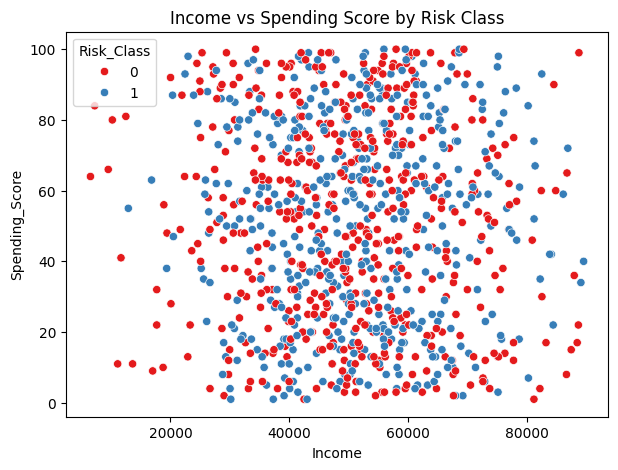

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Income",
    y="Spending_Score",
    hue="Risk_Class",
    palette="Set1"
)
plt.title("Income vs Spending Score by Risk Class")
plt.show()

# Q1(b)(i): Distribution of Credit_Score

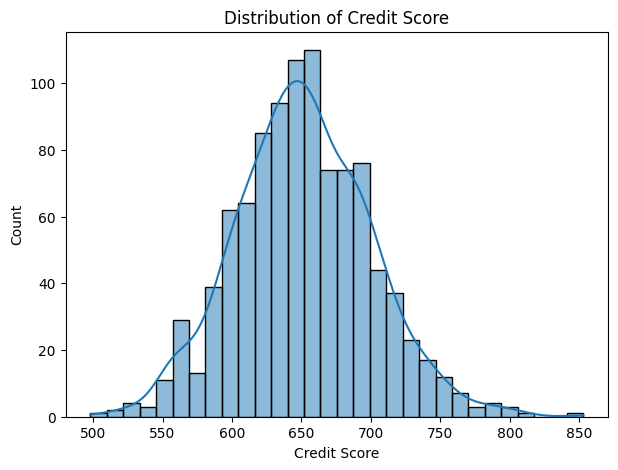

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(df["Credit_Score"], bins=30, kde=True)
plt.xlabel("Credit Score")
plt.title("Distribution of Credit Score")
plt.show()

# Q1(b)(ii): Transactions_Value across Market_Segment

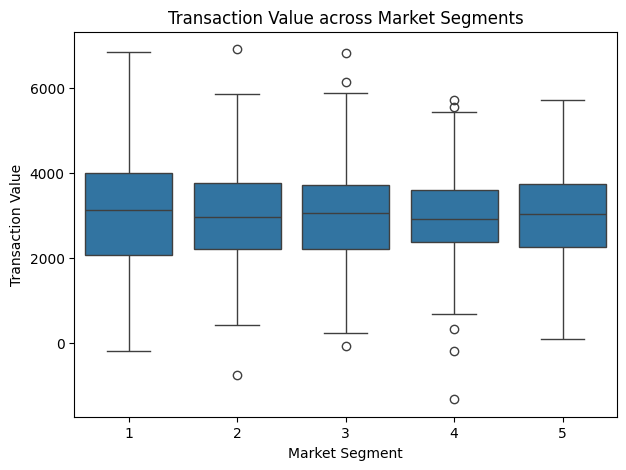

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="Market_Segment",
    y="Transactions_Value"
)
plt.xlabel("Market Segment")
plt.ylabel("Transaction Value")
plt.title("Transaction Value across Market Segments")
plt.show()

# Q1(c): Correlation Heatmap (10 variables)

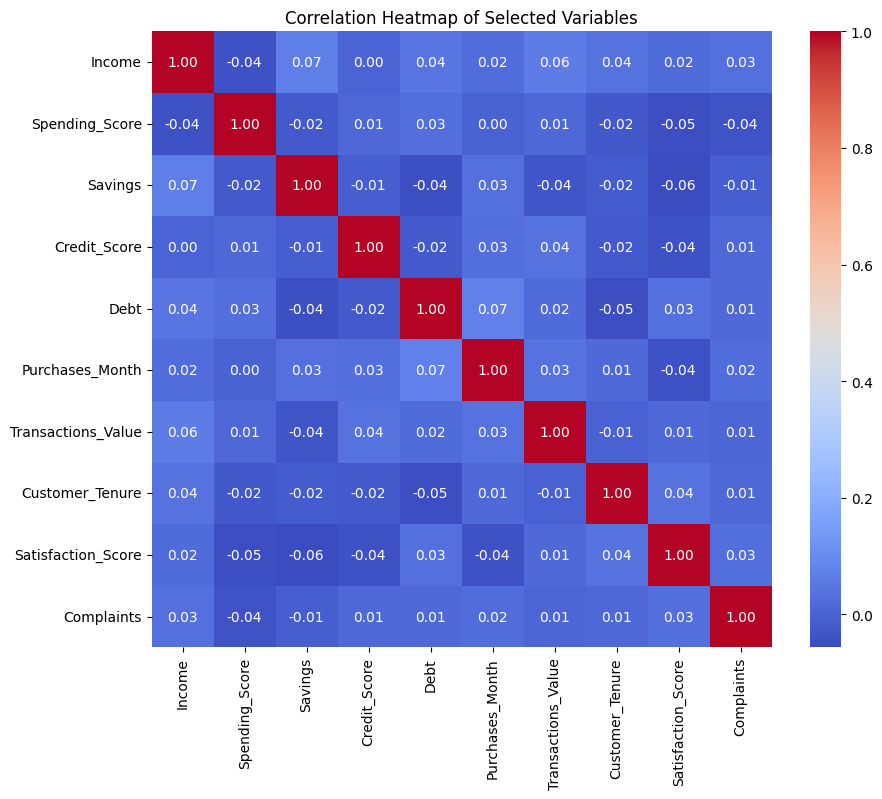

In [10]:
# Select important numerical variables
num_vars = [
    "Income", "Spending_Score", "Savings", "Credit_Score",
    "Debt", "Purchases_Month", "Transactions_Value",
    "Customer_Tenure", "Satisfaction_Score", "Complaints"
]

# Correlation + Heatmap

plt.figure(figsize=(10,8))
corr = df[num_vars].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

# Q2: Parallel Coordinates Plot

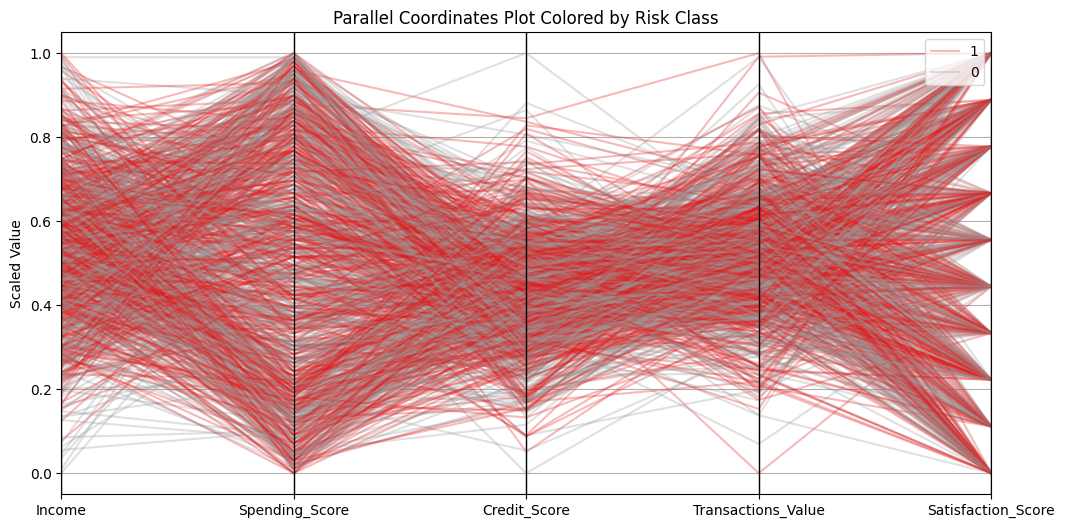

In [12]:
from pandas.plotting import parallel_coordinates

# Select variables
pc_vars = [
    "Income",
    "Spending_Score",
    "Credit_Score",
    "Transactions_Value",
    "Satisfaction_Score",
    "Risk_Class"
]

pc_df = df[pc_vars]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pc_df_scaled = pc_df.copy()

pc_df_scaled[pc_vars[:-1]] = scaler.fit_transform(pc_df[pc_vars[:-1]])

plt.figure(figsize=(12,6))
parallel_coordinates(
    pc_df_scaled,
    class_column="Risk_Class",
    colormap=plt.cm.Set1,
    alpha=0.3
)
plt.title("Parallel Coordinates Plot Colored by Risk Class")
plt.ylabel("Scaled Value")
plt.show()

# 3(a) Standardization + PCA

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical variables (exclude categorical/labels)
num_cols = [
    "Age", "Income", "Education_Years", "Experience_Years",
    "Spending_Score", "Savings", "Credit_Score", "Debt",
    "Hours_Online", "Purchases_Month", "Website_Visits",
    "Time_On_App", "Social_Media_Usage", "Product_Returns",
    "Customer_Tenure", "Satisfaction_Score", "Complaints",
    "Support_Call_Count", "Ad_Clicks", "Email_Open_Rate",
    "Discount_Usage", "Mobile_App_Usage", "Transactions_Value",
    "Loyalty_Points", "Fraud_Risk_Score"
]

X = df[num_cols]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (initially fit all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3(b) Scree Plot & 80% Variance

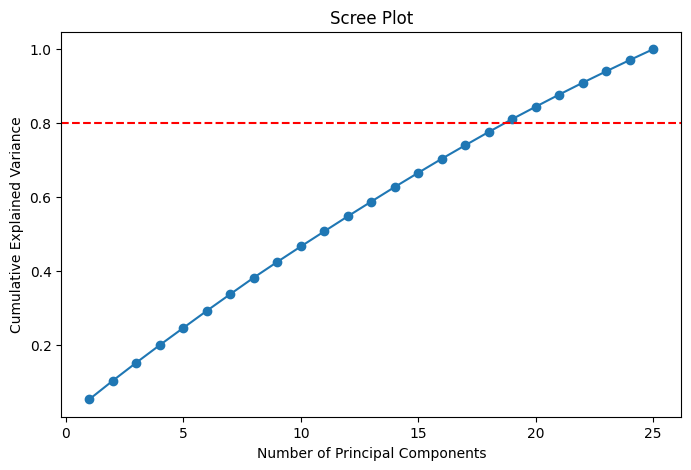

Number of components explaining at least 80% variance: 19


In [14]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

# Number of components for 80% variance
n_components_80 = (cumulative_variance >= 0.80).argmax() + 1
print("Number of components explaining at least 80% variance:", n_components_80)

# 3(c) PCA Visualization (PC1 vs PC2)

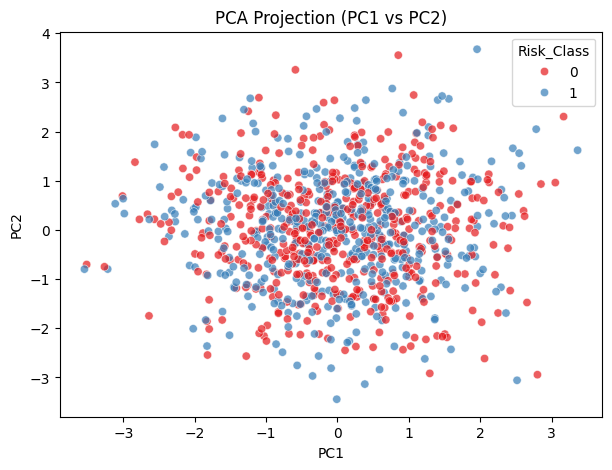

In [15]:
# PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca_2, columns=["PC1", "PC2"]
)
pca_df["Risk_Class"] = df["Risk_Class"]

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Risk_Class",
    palette="Set1",
    alpha=0.7
)
plt.title("PCA Projection (PC1 vs PC2)")
plt.show()

# 3(d) PCA Loadings (Important Variables in PC1)

In [16]:
# PCA loadings
loadings = pd.DataFrame(
    pca.components_[0],
    index=num_cols,
    columns=["PC1_Loading"]
).sort_values(by="PC1_Loading", ascending=False)

print(loadings.head(5))

                    PC1_Loading
Ad_Clicks              0.367209
Email_Open_Rate        0.367012
Discount_Usage         0.253655
Satisfaction_Score     0.206479
Social_Media_Usage     0.180323


# 3(e) Principal Component Regression (PCR)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# PCA with selected components
pca_final = PCA(n_components=n_components_80)
X_pca_final = pca_final.fit_transform(X_scaled)

# Target variable
y = df["Dropout_Probability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_final, y, test_size=0.2, random_state=42
)

# PCR model
pcr_model = LinearRegression()
pcr_model.fit(X_train, y_train)

print("PCR R^2 Score:", pcr_model.score(X_test, y_test))

PCR R^2 Score: -0.07407423336649233


# 4(a) Apply t-SNE and visualize

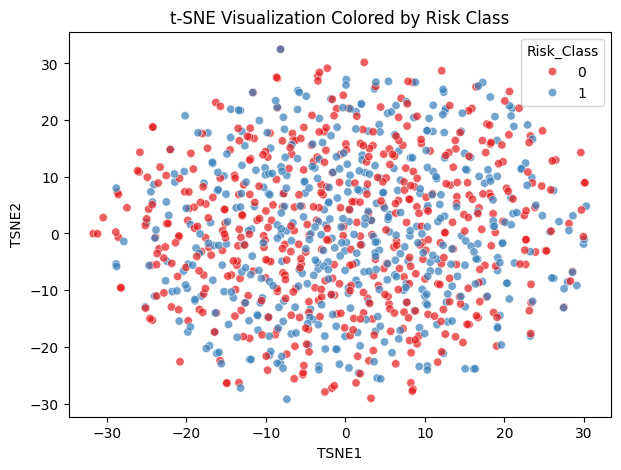

In [18]:
from sklearn.manifold import TSNE

# Use standardized data from PCA step
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    learning_rate='auto'
)

X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(
    X_tsne, columns=["TSNE1", "TSNE2"]
)
tsne_df["Risk_Class"] = df["Risk_Class"]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=tsne_df,
    x="TSNE1",
    y="TSNE2",
    hue="Risk_Class",
    palette="Set1",
    alpha=0.7
)
plt.title("t-SNE Visualization Colored by Risk Class")
plt.show()

# 4(b) Apply UMAP and visualize

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


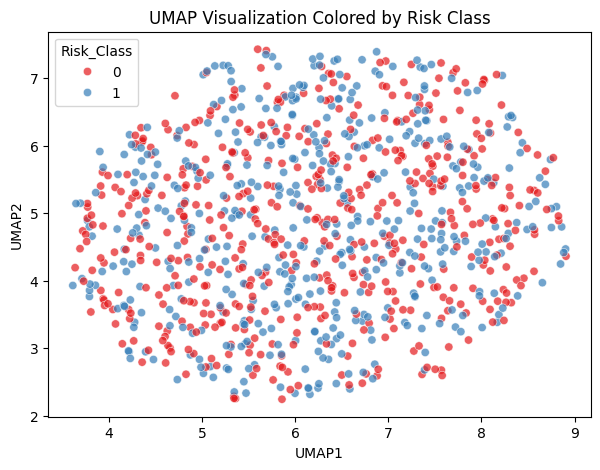

In [19]:
import umap

umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap = umap_model.fit_transform(X_scaled)

umap_df = pd.DataFrame(
    X_umap, columns=["UMAP1", "UMAP2"]
)
umap_df["Risk_Class"] = df["Risk_Class"]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    hue="Risk_Class",
    palette="Set1",
    alpha=0.7
)
plt.title("UMAP Visualization Colored by Risk Class")
plt.show()

# 5(a) K-Means + Elbow Method on PCA-reduced data

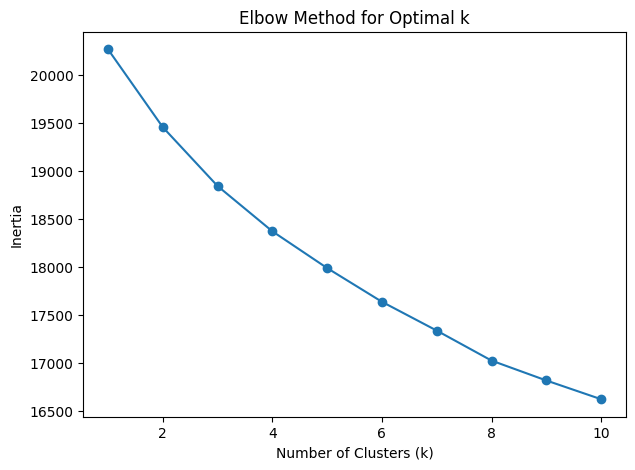

In [20]:
from sklearn.cluster import KMeans

# Use PCA-reduced data (from STEP 4)
X_cluster = X_pca_final

# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Q5(b): Visualize K-Means Clusters in PCA Space

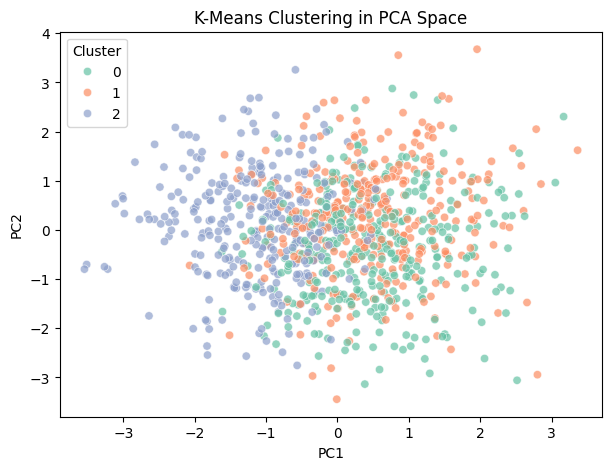

In [21]:
# Apply K-Means with chosen k
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

# Create DataFrame for visualization
cluster_df = pd.DataFrame(
    X_cluster[:, :2], columns=["PC1", "PC2"]
)
cluster_df["Cluster"] = cluster_labels

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=cluster_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2",
    alpha=0.7
)
plt.title("K-Means Clustering in PCA Space")
plt.show()